<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/zaj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Metoda (numpy.polyfit):
a = 2.5005, b = 2.9713



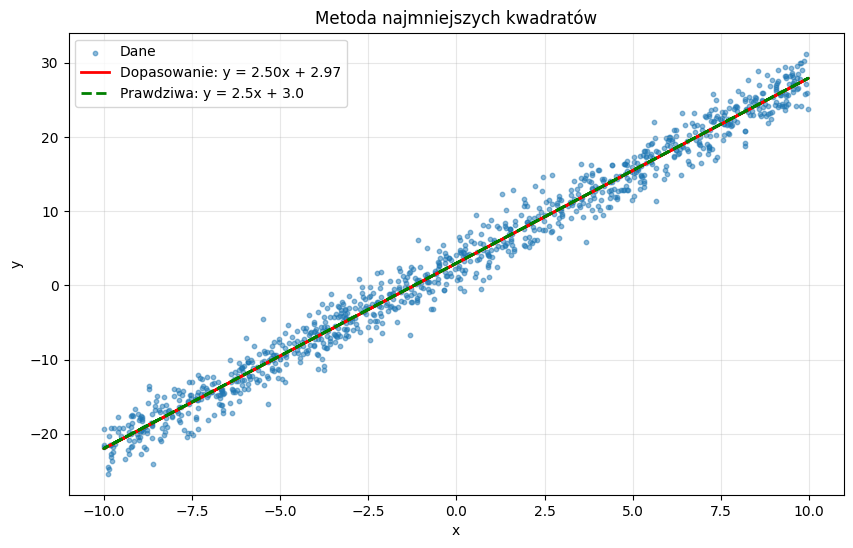

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

a_true = 2.5
b_true = 3.0

x = np.random.uniform(-10, 10, 1000)

noise = np.random.normal(0, 2, 1000)
y = a_true * x + b_true + noise

# numpy.polyfit
coeffs = np.polyfit(x, y, 1)
a_polyfit, b_polyfit = coeffs
print(f"Metoda (numpy.polyfit):")
print(f"a = {a_polyfit:.4f}, b = {b_polyfit:.4f}\n")


plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, label='Dane')
plt.plot(x, a_polyfit * x + b_polyfit, 'r-', linewidth=2,
         label=f'Dopasowanie: y = {a_polyfit:.2f}x + {b_polyfit:.2f}')
plt.plot(x, a_true * x + b_true, 'g--', linewidth=2,
         label=f'Prawdziwa: y = {a_true}x + {b_true}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Metoda najmniejszych kwadratów')
plt.grid(True, alpha=0.3)
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

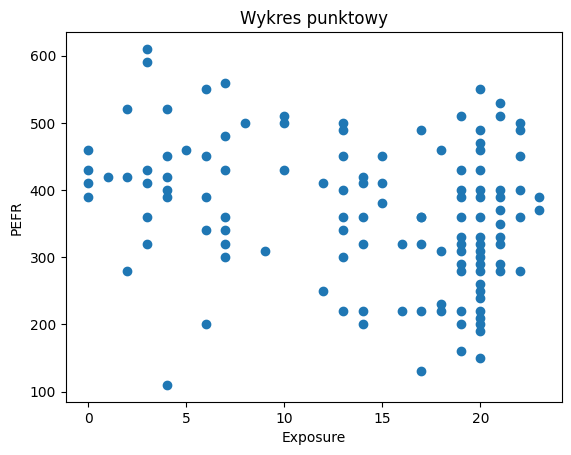

Korelacja Pearsona: -0.2770
Prosta: y = -4.1846 * x + 424.5828


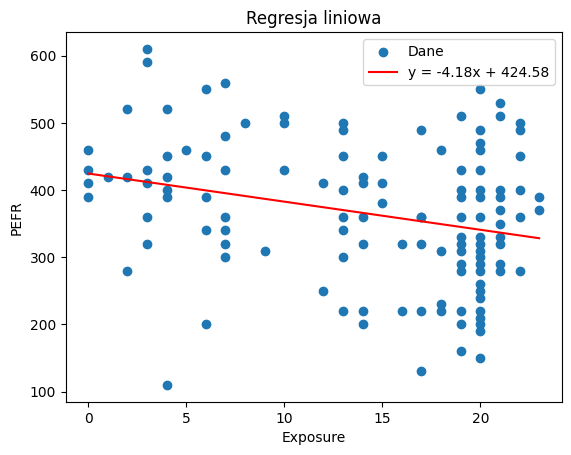

PEFR maleje wraz z Exposure (zła zależność)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv('LungDisease.csv')

# 1. Wykres punktowy
plt.scatter(df['Exposure'], df['PEFR'])
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Wykres punktowy')
plt.show()

# 2. Współczynnik korelacji Pearsona
x = df['Exposure']
y = df['PEFR']

korelacja = np.corrcoef(x, y)[0, 1]
print(f"Korelacja Pearsona: {korelacja:.4f}")

# 3. Regresja liniowa
a, b = np.polyfit(x, y, 1)  # a - nachylenie, b - wyraz wolny
print(f"Prosta: y = {a:.4f} * x + {b:.4f}")

# 4. Wykres z prostą regresji
plt.scatter(x, y, label='Dane')
plt.plot(x, a*x + b, color='red', label=f'y = {a:.2f}x + {b:.2f}')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Regresja liniowa')
plt.legend()
plt.show()

# 5. Interpretacja
if a < 0:
    print("PEFR maleje wraz z Exposure (zła zależność)")
else:
    print("PEFR rośnie wraz z Exposure (dobra zależność)")

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Przekształcone dane:
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47


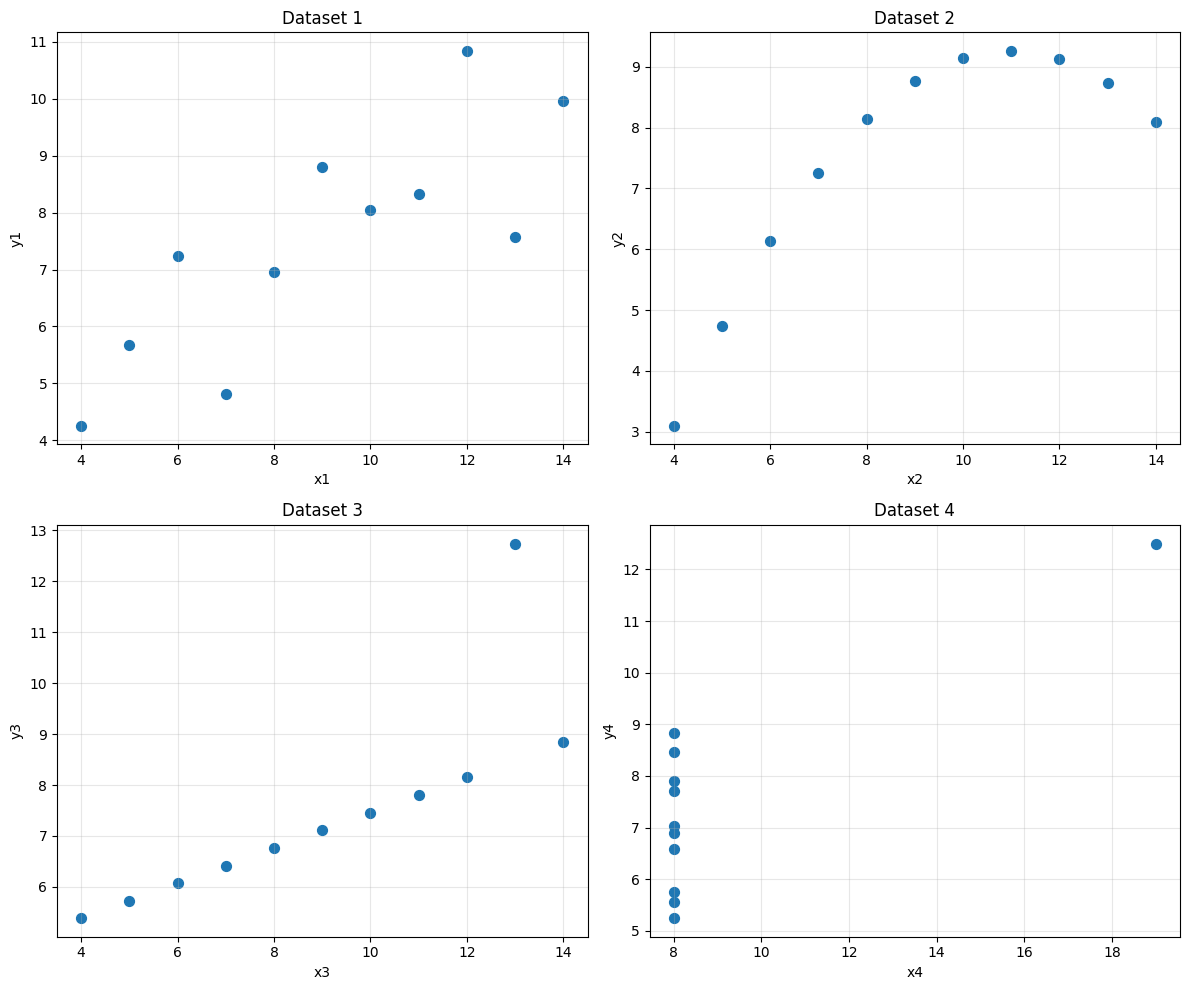


DATASET 1:
  Funkcja liniowa: y = 0.5001 * x + 3.0001
  Współczynnik a = 0.5001 (±0.1179)
  Współczynnik b = 3.0001
  Korelacja Pearsona: r = 0.8164
  R² = 0.6665

DATASET 2:
  Funkcja liniowa: y = 0.5000 * x + 3.0009
  Współczynnik a = 0.5000 (±0.1180)
  Współczynnik b = 3.0009
  Korelacja Pearsona: r = 0.8162
  R² = 0.6662

DATASET 3:
  Funkcja liniowa: y = 0.4997 * x + 3.0025
  Współczynnik a = 0.4997 (±0.1179)
  Współczynnik b = 3.0025
  Korelacja Pearsona: r = 0.8163
  R² = 0.6663

DATASET 4:
  Funkcja liniowa: y = 0.4999 * x + 3.0017
  Współczynnik a = 0.4999 (±0.1178)
  Współczynnik b = 3.0017
  Korelacja Pearsona: r = 0.8165
  R² = 0.6667


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#1
df = pd.read_csv('anscombe.csv', header=0)
df = df.iloc[1:].reset_index(drop=True)
df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
df = df.astype(float)

print("Przekształcone dane:")
print(df.head())

#2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    row = i // 2
    col = i % 2
    num = i + 1

    axes[row, col].scatter(df[f'x{num}'], df[f'y{num}'], s=50)
    axes[row, col].set_xlabel(f'x{num}')
    axes[row, col].set_ylabel(f'y{num}')
    axes[row, col].set_title(f'Dataset {num}')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#3/4
for i in range(1, 5):
    x = df[f'x{i}']
    y = df[f'y{i}']

    # 1. Dopasowanie funkcji liniowej
    a, b = np.polyfit(x, y, 1)

    # 2. Współczynnik korelacji Pearsona
    korelacja = np.corrcoef(x, y)[0, 1]

    # 3. Obliczenie błędów
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"\nDATASET {i}:")
    print(f"  Funkcja liniowa: y = {a:.4f} * x + {b:.4f}")
    print(f"  Współczynnik a = {a:.4f} (±{std_err:.4f})")
    print(f"  Współczynnik b = {b:.4f}")
    print(f"  Korelacja Pearsona: r = {korelacja:.4f}")
    print(f"  R² = {r_value**2:.4f}")
